In [1]:
import pandas as pd
import numpy as np

# open df from csv
position_250274 = pd.read_csv('USDCETH/LVR/Range_USDCETH_250274_LVR_17285193_17681193.csv')
position_515539 = pd.read_csv('USDCETH/LVR/Range_USDCETH_515539_LVR_17371593_17681193.csv')
position_520645 = pd.read_csv('USDCETH/LVR/Range_USDCETH_520645_LVR_17429193_17681193.csv')

range = pd.read_csv('USDCETH/LVR/Range_USDCETH_LVR_17285193_17673993.csv')
# in range df if upper_price and lower_price are same, set both to NA
range.loc[range['upper_price'] == range['lower_price'], ['upper_price', 'lower_price']] = np.nan

In [2]:
# combine range, position_250274, position_515539, position_520645 on date
df = pd.merge(range, position_250274, on='date', how='left', suffixes=('', '_250274'))
df = pd.merge(df, position_515539, on='date', how='left', suffixes=('', '_515539'))
df = pd.merge(df, position_520645, on='date', how='left', suffixes=('', '_520645'))
combined_df = df

In [18]:
import plotly.graph_objects as go
import pandas as pd
import plotly.offline as pyo

# Convert 'date' column to datetime if it's not already
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Create cumulative columns
combined_df['cumulative_LVR'] = combined_df['daily_LVR_ratio'].cumsum()
combined_df['cumulative_LVR_250274'] = combined_df['daily_LVR_ratio_250274'].cumsum()
combined_df['cumulative_LVR_515539'] = combined_df['daily_LVR_ratio_515539'].cumsum()
combined_df['cumulative_LVR_520645'] = combined_df['daily_LVR_ratio_520645'].cumsum()

# Create interactive figure
fig = go.Figure()

# Add traces for each cumulative LVR
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_USD'],
                         mode='lines', name='cumulative_LVR', line=dict(color='red', width=3)))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_USD_250274'],
                         mode='lines', name='cumulative_LVR_250274', line=dict(color='green')))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_USD_515539'],
                         mode='lines', name='cumulative_LVR_515539', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_USD_520645'],
                         mode='lines', name='cumulative_LVR_520645', line=dict(color='blue')))

# Set layout options
fig.update_layout(
    title='Cumulative LVR in USD for USDCETH',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Cumulative LVR'),
    legend=dict(x=0, y=1),
    autosize=True,
    margin=dict(l=50, r=50, t=80, b=50),
    hovermode='x unified'
)

# Save the chart as an HTML file
chart_filename = 'interactive_chart.html'
pyo.plot(fig, filename=chart_filename, auto_open=False)

fig.show()

In [17]:
import plotly.graph_objects as go
import pandas as pd
import plotly.offline as pyo

# Convert 'date' column to datetime if it's not already
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Create cumulative columns
combined_df['cumulative_LVR'] = combined_df['daily_LVR_ratio'].cumsum()
combined_df['cumulative_LVR_250274'] = combined_df['daily_LVR_ratio_250274'].cumsum()
combined_df['cumulative_LVR_515539'] = combined_df['daily_LVR_ratio_515539'].cumsum()
combined_df['cumulative_LVR_520645'] = combined_df['daily_LVR_ratio_520645'].cumsum()

# Create interactive figure
fig = go.Figure()

# Add traces for each cumulative LVR
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR'],
                         mode='lines', name='cumulative_LVR', line=dict(color='red', width=3)))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_250274'],
                         mode='lines', name='cumulative_LVR_250274', line=dict(color='green')))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_515539'],
                         mode='lines', name='cumulative_LVR_515539', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['cumulative_LVR_520645'],
                         mode='lines', name='cumulative_LVR_520645', line=dict(color='blue')))

# Set layout options
fig.update_layout(
    title='Cumulative LVR for USDCETH',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Cumulative LVR'),
    legend=dict(x=0, y=1),
    autosize=True,
    margin=dict(l=50, r=50, t=80, b=50),
    hovermode='x unified'
)

# Save the chart as an HTML file
chart_filename = 'interactive_chart.html'
pyo.plot(fig, filename=chart_filename, auto_open=False)

fig.show()

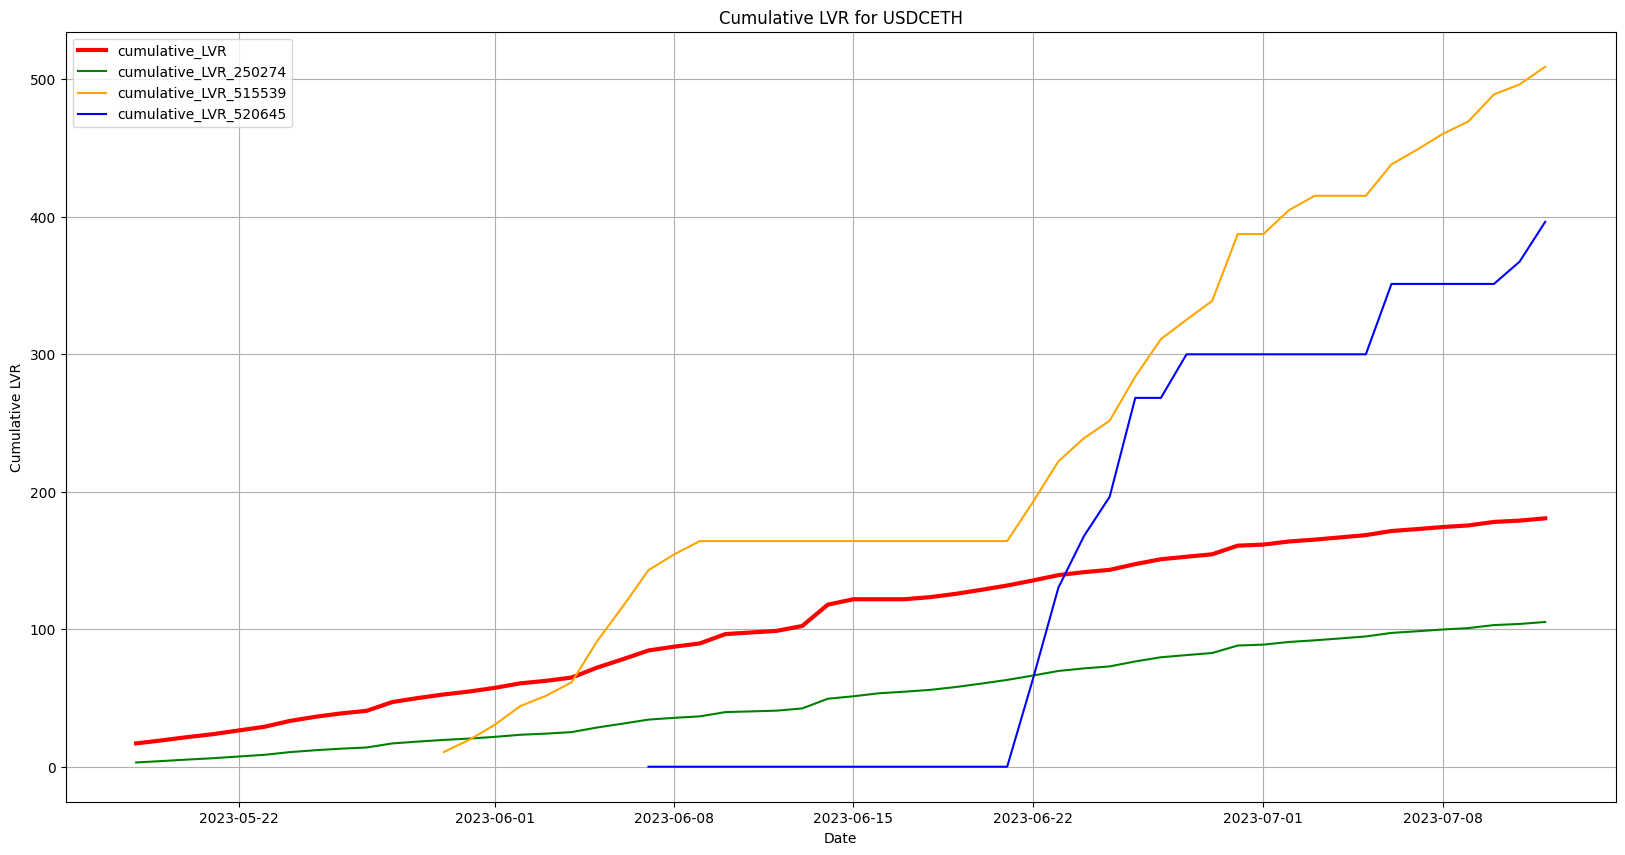

In [4]:
# create new columns for cumulative LVR
combined_df['cumulative_LVR'] = combined_df['daily_LVR_ratio'].cumsum()
combined_df['cumulative_LVR_250274'] = combined_df['daily_LVR_ratio_250274'].cumsum()
combined_df['cumulative_LVR_515539'] = combined_df['daily_LVR_ratio_515539'].cumsum()
combined_df['cumulative_LVR_520645'] = combined_df['daily_LVR_ratio_520645'].cumsum()

# plot date vs cumulative LVR, cumulative LVR_250274, cumulative LVR_515539, cumulative LVR_520645

import matplotlib.pyplot as plt

combined_df['date'] = pd.to_datetime(combined_df['date'])

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(combined_df['date'], combined_df['cumulative_LVR'], label='cumulative_LVR', color='red', linewidth=3)
ax.plot(combined_df['date'], combined_df['cumulative_LVR_250274'], label='cumulative_LVR_250274', color='green')
ax.plot(combined_df['date'], combined_df['cumulative_LVR_515539'], label='cumulative_LVR_515539', color='orange')
ax.plot(combined_df['date'], combined_df['cumulative_LVR_520645'], label='cumulative_LVR_520645', color='blue')
ax.set_xlabel('Date')
ax.grid(True)
ax.set_ylabel('Cumulative LVR')
ax.set_title('Cumulative LVR for USDCETH')
ax.legend()

plt.show()

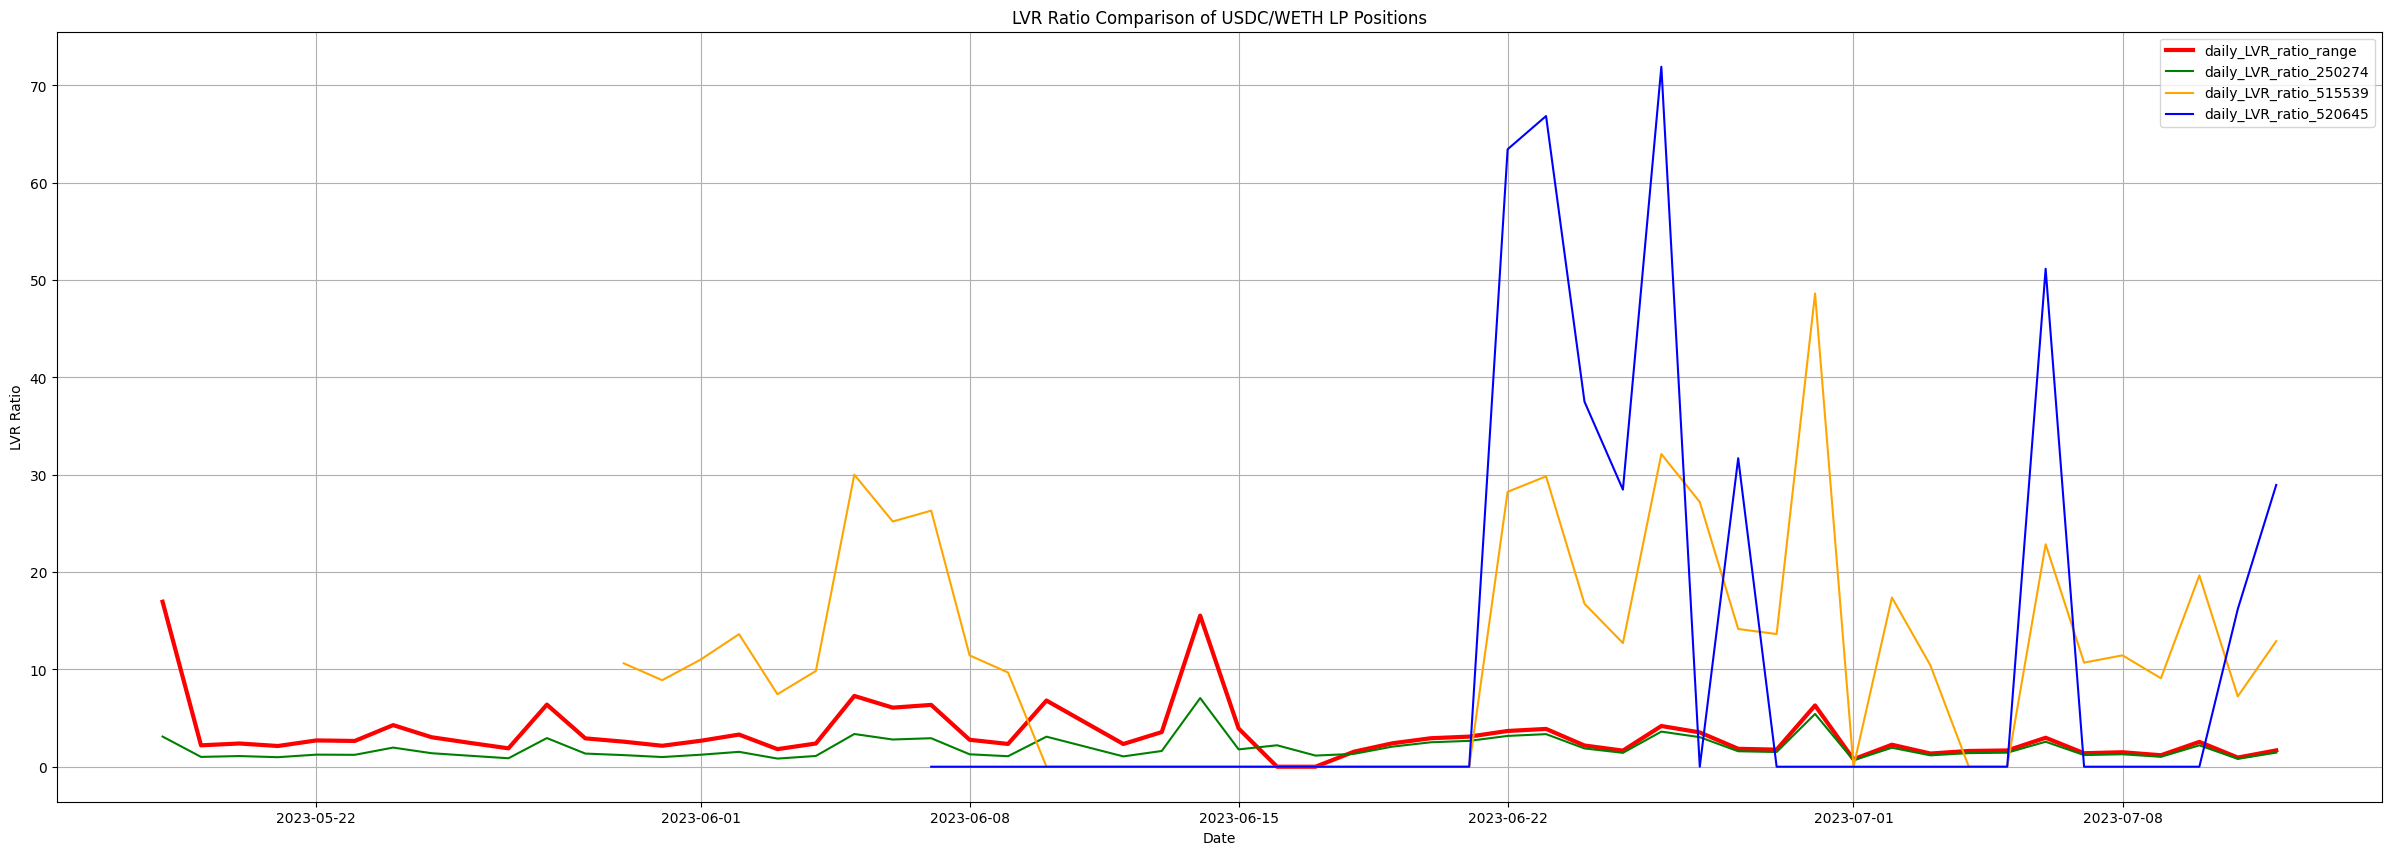

In [5]:
# plot date vs daily_LVR_ratio_range, daily_LVR_ratio_366096, daily_LVR_ratio_453456, daily_LVR_ratio_506262

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(30,10))
combined_df['date'] = pd.to_datetime(combined_df['date'])

ax.plot(combined_df['date'], combined_df['daily_LVR_ratio'], label='daily_LVR_ratio_range', color='red', linewidth=3)
ax.plot(combined_df['date'], combined_df['daily_LVR_ratio_250274'], label='daily_LVR_ratio_250274', color='green')
ax.plot(combined_df['date'], combined_df['daily_LVR_ratio_515539'], label='daily_LVR_ratio_515539', color='orange')
ax.plot(combined_df['date'], combined_df['daily_LVR_ratio_520645'], label='daily_LVR_ratio_520645', color='blue')

ax.set(xlabel='Date', ylabel='LVR Ratio', title='LVR Ratio Comparison of USDC/WETH LP Positions')
ax.grid(True)
ax.legend()

plt.show()

In [9]:
import plotly.graph_objects as go
import pandas as pd

# Convert 'date' column to datetime if it's not already
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Create interactive figure
fig = go.Figure()

# Add traces for each daily LVR ratio
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['daily_LVR_ratio'],
                         mode='lines', name='daily_LVR_ratio_range', line=dict(color='red', width=3)))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['daily_LVR_ratio_250274'],
                         mode='lines', name='daily_LVR_ratio_250274', line=dict(color='green')))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['daily_LVR_ratio_515539'],
                         mode='lines', name='daily_LVR_ratio_515539', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=combined_df['date'], y=combined_df['daily_LVR_ratio_520645'],
                         mode='lines', name='daily_LVR_ratio_520645', line=dict(color='blue')))

# Set layout options
fig.update_layout(
    title='LVR Ratio Comparison of USDC/WETH LP Positions',
    xaxis=dict(title='Date'),
    yaxis=dict(title='LVR Ratio'),
    legend=dict(x=0, y=1),
    autosize=True,
    margin=dict(l=50, r=50, t=80, b=50),
    hovermode='x unified'
)

# Save the chart as an HTML file
chart_filename = 'interactive_chart.html'
pyo.plot(fig, filename=chart_filename, auto_open=False)

# Display the interactive chart
fig.show()


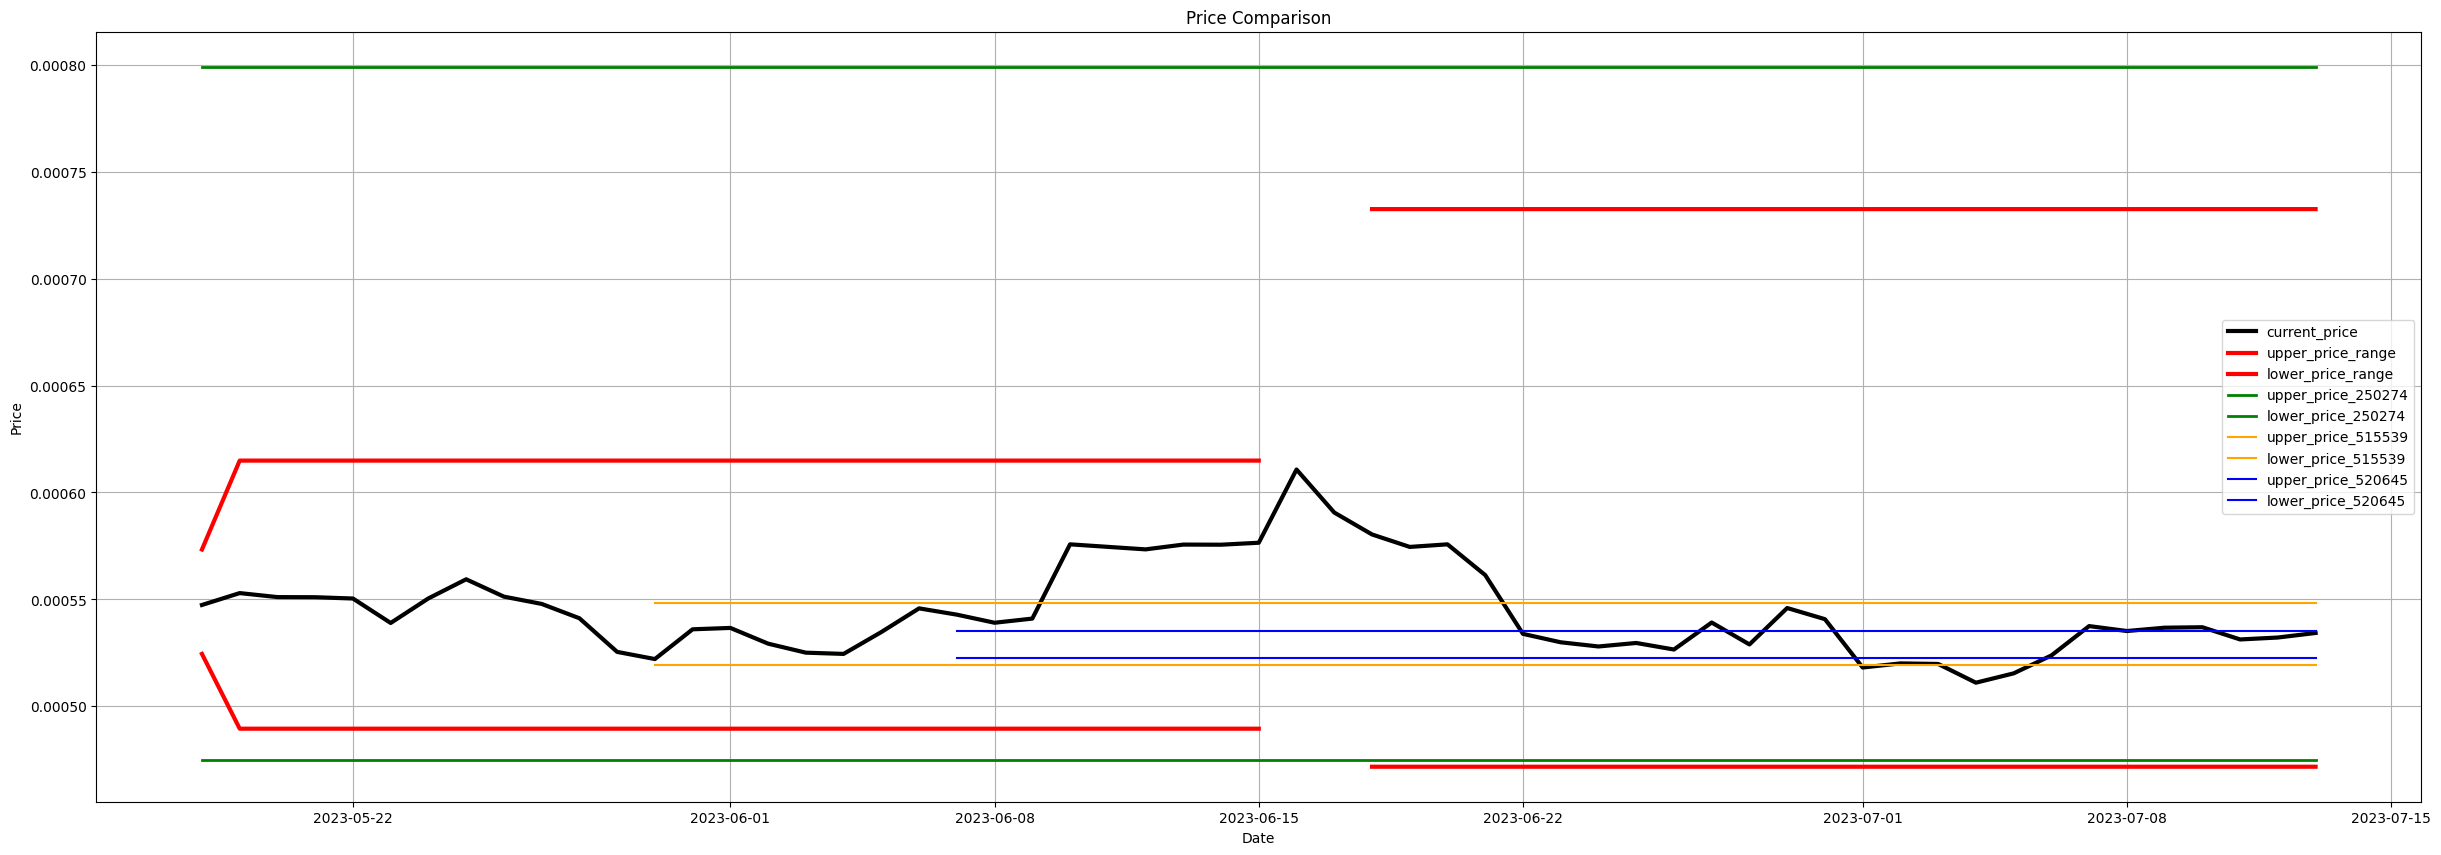

In [6]:
fig, ax = plt.subplots(figsize=(30,10))
combined_df['date'] = pd.to_datetime(combined_df['date'])

ax.plot(combined_df['date'], combined_df['current_price'], label='current_price',color='black', linewidth=3)
ax.plot(combined_df['date'], combined_df['upper_price'], label='upper_price_range',color='red', linewidth=3)
ax.plot(combined_df['date'], combined_df['lower_price'], label='lower_price_range',color='red', linewidth=3)
ax.plot(combined_df['date'], combined_df['upper_price_250274'], label='upper_price_250274',color='green', linewidth=2)
ax.plot(combined_df['date'], combined_df['lower_price_250274'], label='lower_price_250274',color='green', linewidth=2)
ax.plot(combined_df['date'], combined_df['upper_price_515539'], label='upper_price_515539',color='orange')
ax.plot(combined_df['date'], combined_df['lower_price_515539'], label='lower_price_515539',color='orange')
ax.plot(combined_df['date'], combined_df['upper_price_520645'], label='upper_price_520645',color='blue')
ax.plot(combined_df['date'], combined_df['lower_price_520645'], label='lower_price_520645',color='blue')

ax.set(xlabel='Date', ylabel='Price', title='Price Comparison')
ax.grid(True)
ax.legend()

plt.show()